THÔNG TIN SINH VIÊN

MSSV: 21015721

TÊN: NGUYỄN THỊ HỒNG THẮM

SỐ MÁY: 37

NGÀY KT:10/17/2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

https://colab.research.google.com/drive/11WtAhPkRJ9dfzXE0mvYCzibXIAvRDkuY?usp=sharing

# Câu 1: (5  điểm) Cho ảnh I  như hình 1.  Với  A  là  số  máy  sinh viên  đang sử dụng, B  là ký số thứ 4 của MSSV.
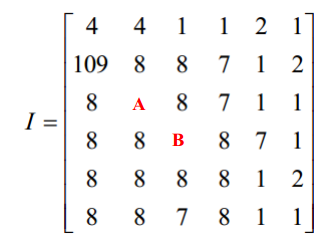

# câu 1

**I** =

      ([[  4, 4, 1, 1, 2, 1],
        [109, 8, 8, 7, 1, 2],
        [  8, A, 8, 7, 1, 1],
        [  8, 8, B, 8, 7, 1],
        [  8, 8, 8, 8, 1, 2],
        [  8, 8, 7, 8, 1, 1]
      ])


---






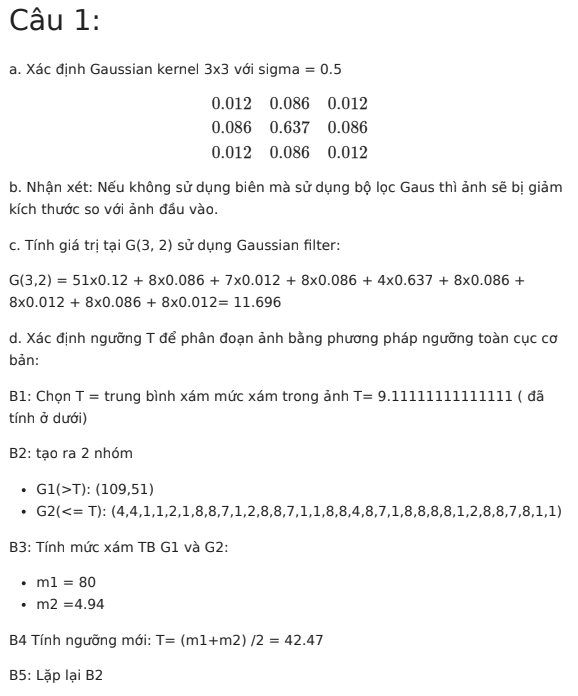

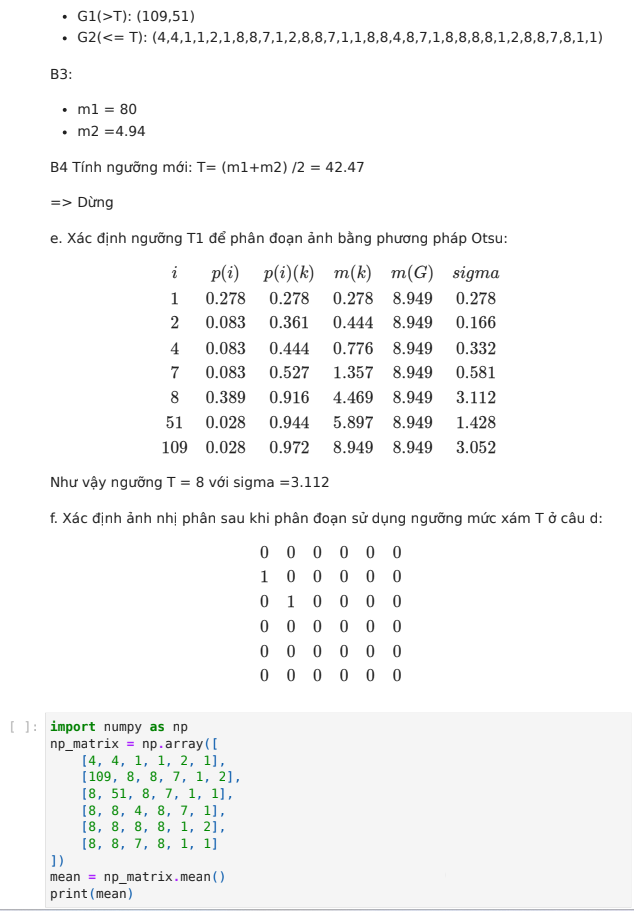

In [ ]:
i = np.array([[  4, 4, 1, 1, 2, 1],
    [109, 8, 8, 7, 1, 2],
    [  8, 1, 8, 7, 1, 1],
    [  8, 8, 37, 8, 7, 1],
    [  8, 8, 8, 8, 1, 2],
    [  8, 8, 7, 8, 1, 1]
  ],dtype= np.float64)



#### a)  Xác định Gaussian kernel 3x3 với sigma = 0.25, 0.5, .075, 0.95, 1,25,…

- sigma = 0.5

- công thức: 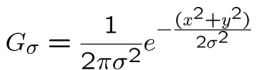
- g(-1,-1) = 0.012
- g(-1,0) = 0.086
- g(-1,1) = 0.012
-------------
- g(0,-1) = 0.086
- g(0,0) = 0.637
- g(0,1) = 0.086
--------------
- g(1,-1) = 0.012
- g(1,0) = 0.086
- g(1,1) = 0.012




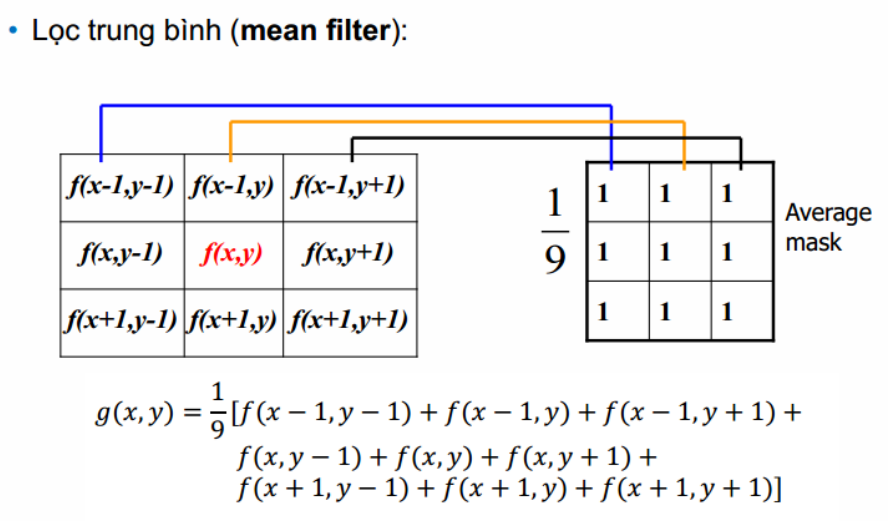

In [ ]:
a = 3//2
a

1

In [ ]:
import cv2

x = cv2.blur(i,(3,3),borderType=cv2.BORDER_CONSTANT)
print(i)
print(x)


[[  4.   4.   1.   1.   2.   1.]
 [109.   8.   8.   7.   1.   2.]
 [  8.   1.   8.   7.   1.   1.]
 [  8.   8.  37.   8.   7.   1.]
 [  8.   8.   8.   8.   1.   2.]
 [  8.   8.   7.   8.   1.   1.]]
[[13.88888889 14.88888889  3.22222222  2.22222222  1.55555556  0.66666667]
 [14.88888889 16.77777778  5.          4.          2.55555556  0.88888889]
 [15.77777778 21.66666667 10.22222222  9.33333333  3.88888889  1.44444444]
 [ 4.55555556 10.44444444 10.33333333  9.44444444  4.          1.44444444]
 [ 5.33333333 11.11111111 11.11111111  9.44444444  4.11111111  1.44444444]
 [ 3.55555556  5.22222222  5.22222222  3.66666667  2.33333333  0.55555556]]


In [ ]:
kernel = np.ones((3,3),dtype=np.float64)/9
# kernel  = kernel.astype(np.uint8)

x = cv2.filter2D(i,-1,kernel,borderType=cv2.BORDER_CONSTANT)
x =x.astype(np.uint8)
print(i)
print(x)

[[  4.   4.   1.   1.   2.   1.]
 [109.   8.   8.   7.   1.   2.]
 [  8.   1.   8.   7.   1.   1.]
 [  8.   8.  37.   8.   7.   1.]
 [  8.   8.   8.   8.   1.   2.]
 [  8.   8.   7.   8.   1.   1.]]
[[13 14  3  2  1  0]
 [14 16  5  4  2  0]
 [15 21 10  9  3  1]
 [ 4 10 10  9  4  1]
 [ 5 11 11  9  4  1]
 [ 3  5  5  3  2  0]]


#### b)  Giải thích  cách  xác định ảnh đầu  ra  G sử dụng bộ lọc trung bình Gaussian  trên, không sử dụng biên.

- 1. Định nghĩa bộ lọc Gaussian

Bộ lọc Gaussian là một ma trận
3
×
3
3×3 được tính dựa trên công thức Gaussian. Nó có các trọng số phản ánh mật độ Gaussian.

- 2. Kích thước ảnh và kernel

    Giả sử bạn có ảnh
𝐼
I kích thước
𝑚
×
𝑛
m×n và kernel Gaussian kích thước
3
×
3
3×3.

- 3. Cách thực hiện bộ lọc

      Để áp dụng bộ lọc Gaussian lên ảnh I, bạn sẽ làm như sau:

      1. Di chuyển qua từng pixel của ảnh I:

      - Chỉ áp dụng bộ lọc cho các pixel mà có đủ các pixel lân cận, tức là không sử dụng các pixel nằm ở biên (các pixel ở hàng đầu, hàng cuối, cột đầu và cột cuối).
      Tính giá trị mới cho mỗi pixel:

      - Đối với mỗi pixel
      (
      𝑖
      ,
      𝑗
      )
      (i,j) mà không nằm ở biên, bạn lấy vùng
      3
      ×
      3
      3×3 xung quanh pixel đó (bao gồm cả pixel chính nó và 8 pixel lân cận).

      2. Nhân từng giá trị pixel trong vùng
      3
      ×
      3
      3×3 với trọng số tương ứng trong kernel Gaussian.
      Cộng tất cả các giá trị này lại và chia cho tổng trọng số của kernel để nhận được giá trị mới cho pixel
      (
      𝑖
      ,
      𝑗
      )
      (i,j).
- 4. Công thức tính toán

        Giá trị mới của pixel
        𝐺
        (
        𝑖
        ,
        𝑗
        )
        G(i,j) được tính bằng:

        𝐺
        (
        𝑖
        ,
        𝑗
        )
        =
        ∑
        𝑘
        =
        −
        1
        1
        ∑
        𝑙
        =
        −
        1
        1
        𝐼
        (
        𝑖
        +
        𝑘
        ,
        𝑗
        +
        𝑙
        )
        ⋅
        𝐾
        (
        𝑘
        +
        1
        ,
        𝑙
        +
        1
        )
        G(i,j)=
        k=−1
        ∑
        1
        ​
          
        l=−1
        ∑
        1
        ​
        I(i+k,j+l)⋅K(k+1,l+1)
        Trong đó:

        𝐾
        K là kernel Gaussian.
        (
        𝑘
        ,
        𝑙
        )
        (k,l) lần lượt là các chỉ số cho hàng và cột của kernel.
- 5. Kết quả

        Kết quả là một ma trận
        𝐺
        G có kích thước
        (
        𝑚
        −
        2
        )
        ×
        (
        𝑛
        −
        2
        )
        (m−2)×(n−2) (do không sử dụng biên).
        Nếu bạn cần kích thước giống như ảnh gốc, bạn có thể thêm các giá trị biên (padding) sau đó hoặc xử lý riêng.

#### c)  Tính giá trị tại G(3, 2) sử dụng Gaussian  filter.

In [ ]:
#Gaussian
import numpy as np

def gaussian_kernel(size=3, sigma=0.5):
    kernel = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            # Tính tọa độ x, y
            x_coord = x - (size // 2)
            y_coord = y - (size // 2)
            # Tính giá trị Gaussian
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x_coord**2 + y_coord**2) / (2 * sigma**2)))

    # Chuẩn hóa kernel
    # kernel /= np.sum(kernel)
    return kernel

# Tạo Gaussian kernel
kernel = gaussian_kernel()
kernel = np.round(kernel,3)
# In kết quả
print("Gaussian Kernel:")
print(kernel)



Gaussian Kernel:
[[0.012 0.086 0.012]
 [0.086 0.637 0.086]
 [0.012 0.086 0.012]]


- G(3,2) = 38
- matrix G[1:3,0:2]=[[109,8,8],[8,3,8],
[8,8,1]];
- G(3,2) sau khi sử dụng Gaussian  filter: G(3,2) = 28.47


In [ ]:
# Ma trận ảnh I
I = np.array([[  4, 4, 1, 1, 2, 1],
               [109, 8, 8, 7, 1, 2],
               [  8, 12, 8, 7, 1, 1],
               [  8, 8, 38, 8, 7, 1],
               [  8, 8, 8, 8, 1, 2],
               [  8, 8, 7, 8, 1, 1]])

# Lấy giá trị kernel


# Tính giá trị G(3, 2)
G_3_2 = 0
for k in range(-1, 2):
    for l in range(-1, 2):
        G_3_2 += I[3+k, 2+l] * kernel[k+1, l+1]

print("Giá trị tại G(3, 2):", G_3_2)


Giá trị tại G(3, 2): 27.377999999999997


In [ ]:
c = cv2.filter2D(i,-1,kernel,borderType=cv2.BORDER_CONSTANT)
# c = c.astype(np.uint8)
c

array([[12.362,  5.07 ,  1.935,  1.605,  1.64 ,  0.993],
       [71.213, 15.84 ,  7.316,  6.065,  1.789,  1.568],
       [15.436,  5.333, 10.026,  7.159,  2.229,  1.077],
       [ 7.268, 10.124, 26.609, 10.386,  5.621,  1.521],
       [ 7.352,  8.568, 10.64 ,  7.87 ,  2.401,  1.628],
       [ 6.568,  7.266,  6.715,  6.58 ,  1.617,  0.907]])

In [ ]:
b = cv2.GaussianBlur(i,(3,3),0.5,borderType=cv2.BORDER_CONSTANT)
# b = b.astype(np.uint8)
b

array([[12.03974217,  4.89425888,  1.87915665,  1.55963572,  1.59224621,
         0.96596879],
       [69.24193513, 15.41897442,  7.11391296,  5.89648565,  1.73861847,
         1.52418379],
       [15.02697771,  5.13925654,  9.74886589,  6.94831539,  2.16464638,
         1.04537495],
       [ 7.06853801,  9.84402913, 25.87031399, 10.10431434,  5.46163104,
         1.48022956],
       [ 7.14794417,  8.31762462, 10.34694616,  7.64013819,  2.33228539,
         1.58090247],
       [ 6.38663823,  7.06412466,  6.52859714,  6.39798197,  1.57097945,
         0.88214928]])

In [ ]:
a = I[2:5,1:4]
x = a * kernel
x.sum()

27.246

In [ ]:
I[3,2]

38

In [ ]:
gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

In [ ]:
from scipy.ndimage import convolve
import numpy as np

# Dữ liệu bạn cung cấp
i = np.array([
    [  4, 4, 1, 1, 2, 1],
    [109, 8, 8, 7, 1, 2],
    [  8, 1, 8, 7, 1, 1],
    [  8, 8, 38, 8, 7, 1],
    [  8, 8, 8, 8, 1, 2],
    [  8, 8, 7, 8, 1, 1]
])

# Áp dụng bộ lọc Gaussian
result = convolve(i, gaussian_filter)

# Lấy giá trị tại G(3, 2)
G_3_2 = result[2, 1]  # (the index 3, 2 in human-readable terms)
print(G_3_2)


14


In [ ]:
I[3,2]

38

#### d)  Xác định ngưỡng T để phân đoạn ảnh bằng phương pháp ngưỡng toàn cục cơ bản

- 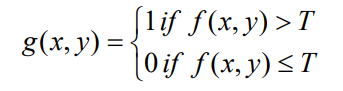

In [ ]:
maxtrix = np.array([[109, 8, 8],
                    [8, 37, 8],
                    [8, 8, 1]])

In [ ]:
sigma = 0.5
size = 3
kernel = np.zeros((size, size))

# Tính toán cho từng phần tử trong kernel
for x in range(-1, 2):
    for y in range(-1, 2):
        kernel[x + 1, y + 1] = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x**2 + y**2) / (2 * sigma**2)))
        kernel[x + 1, y + 1] = kernel[x + 1, y + 1].round(3)
# Chuẩn hóa kernel
print(kernel)

[[0.012 0.086 0.012]
 [0.086 0.637 0.086]
 [0.012 0.086 0.012]]


In [ ]:
def convolution(maxtrix, kernel):
    result = np.zeros_like(maxtrix)
    kq = (maxtrix * kernel).sum()
    return kq
print(convolution(maxtrix, kernel))

27.833


In [ ]:
I = np.array([[4, 4, 1, 1, 2, 1],
              [109, 8, 8, 7, 1, 2],
              [8, 37, 8, 7, 1, 1],
              [8, 8, 1, 8, 7, 1],
              [8, 8, 8, 8, 1, 2],
              [8, 8, 7, 8, 1, 1]])

##  câu 2a

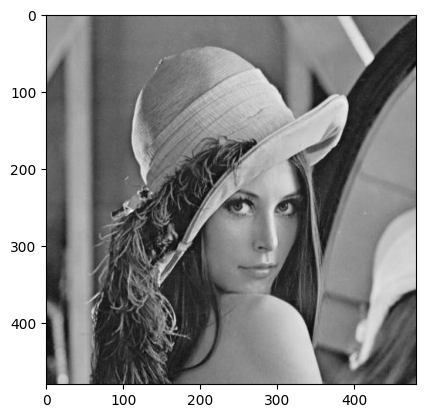

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)
plt.imshow(img,cmap = 'gray')


In [ ]:
# 2a tính cường độ Gradient sử dụng bộ lọc Robert

kernel_x_robert = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,-1]],np.float32)

kernel_y_robert = np.array([[0,0,0],
                     [0,0,1],
                     [0,-1,0]],np.float32)

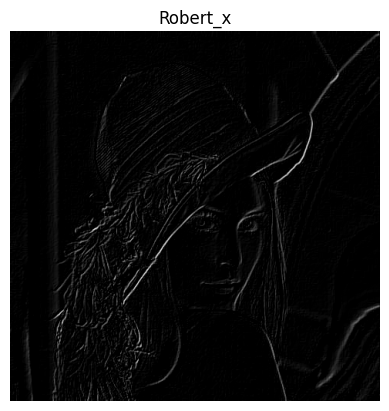

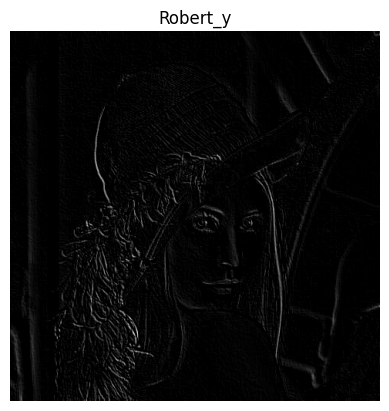

In [ ]:
# áp dụng bộ lộc robert
robert_x = cv2.filter2D(img, -1, kernel_x_robert)
robert_y = cv2.filter2D(img, -1, kernel_y_robert)
plt.imshow(robert_x,cmap = 'gray')
plt.title('Robert_x')
plt.axis('off')
plt.show()
plt.imshow(robert_y,cmap = 'gray')
plt.title('Robert_y')
plt.axis('off')
plt.show()

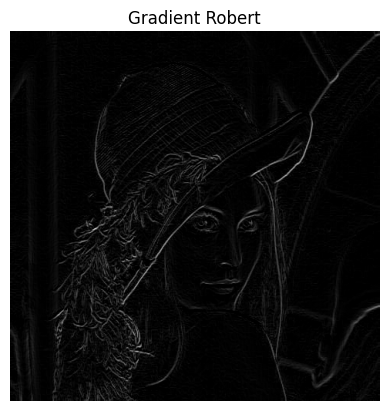

In [ ]:
# tính độ lớn của gradient
grad = np.abs(robert_x) + np.abs(robert_y)
plt.imshow(grad,cmap = 'gray')
plt.title('Gradient Robert')
plt.axis('off')
plt.show()


In [ ]:
# chuẩn hóa độ lớn kết quả 0 - 255
grad = grad / np.max(grad) * 255
grad = grad.astype(np.uint8)


(-0.5, 479.5, 479.5, -0.5)

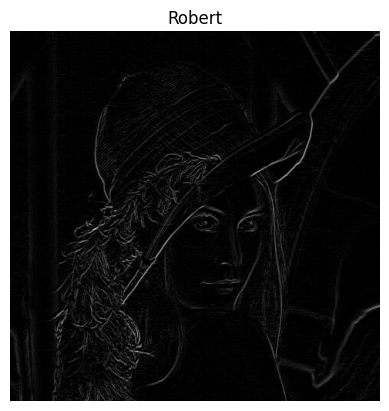

In [ ]:
# hiển thị ảnh kết quả
plt.imshow(grad,cmap = 'gray')
plt.title('Robert')
plt.axis('off')

In [ ]:
# tính cường độ gradient sử dụng bộ lọc Sobel

img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

kernel_x_sobel = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
kernel_y_sobel = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])



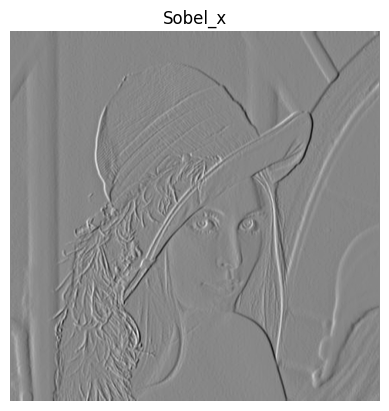

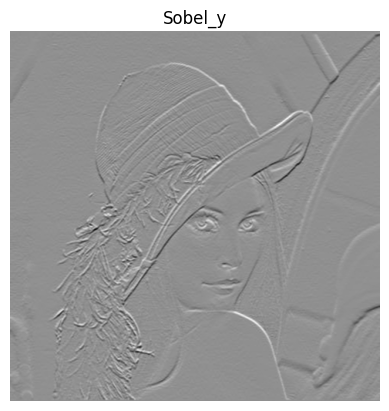

<Figure size 640x480 with 0 Axes>

In [ ]:
# áp dụng kernel Sobel
sobel_x = cv2.filter2D(img, cv2.CV_64F, kernel_x_sobel)
sobel_y = cv2.filter2D(img, cv2.CV_64F, kernel_y_sobel)
plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel_x')
plt.axis('off')
plt.show()
plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel_y')
plt.axis('off')
plt.show()
plt.tight_layout()

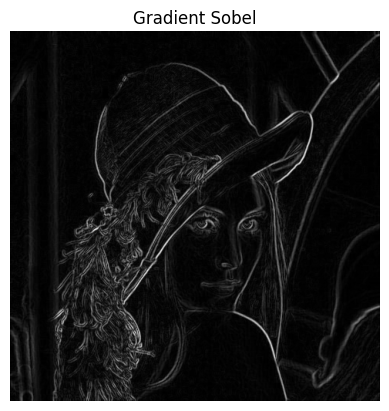

In [ ]:
# tính độ lớn của gradient
grad = np.abs(sobel_x) + np.abs(sobel_y)
plt.imshow(grad,cmap = 'gray')
plt.title('Gradient Sobel')
plt.axis('off')
plt.show()

In [ ]:
# chuẩn hóa kết quả
grad = grad / np.max(grad) * 255
grad = grad.astype(np.uint8)


(-0.5, 479.5, 479.5, -0.5)

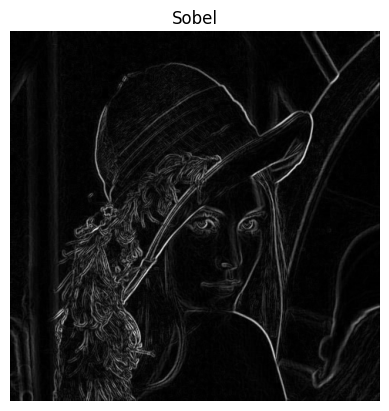

In [ ]:
# hiển thị ảnh kết quả
plt.imshow(grad,cmap = 'gray')
plt.title('Sobel')
plt.axis('off')

In [ ]:
# tính cường độ gradient sử dụng bộ lọc Prewitt
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

kernel_x_prewitt = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])
kernel_y_prewitt = np.array([[-1,-1,-1],
                     [0,0,0],
                     [1,1,1]])


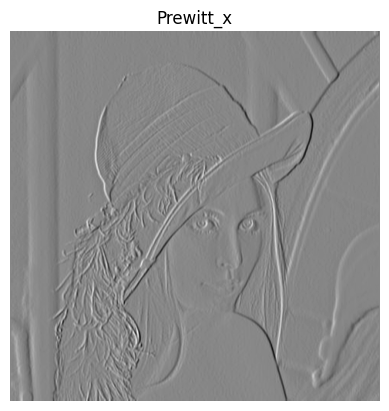

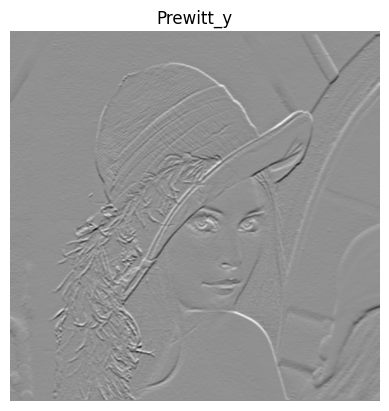

<Figure size 640x480 with 0 Axes>

In [ ]:
# áp dụng kernel Prewitt
prewitt_x = cv2.filter2D(img, cv2.CV_64F, kernel_x_prewitt)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, kernel_y_prewitt)
plt.imshow(prewitt_x,cmap = 'gray')
plt.title('Prewitt_x')
plt.axis('off')
plt.show()
plt.imshow(prewitt_y,cmap = 'gray')
plt.title('Prewitt_y')
plt.axis('off')
plt.show()
plt.tight_layout()

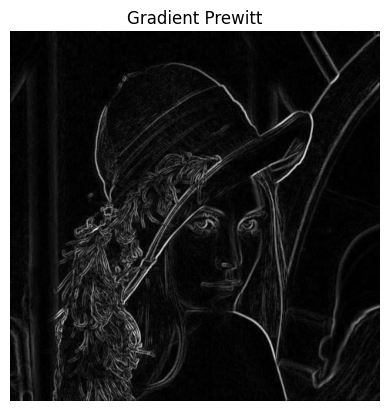

In [ ]:
# tính độ lớn Gradient
grad = np.abs(prewitt_x) + np.abs(prewitt_y)
plt.imshow(grad,cmap = 'gray')
plt.title('Gradient Prewitt')
plt.axis('off')
plt.show()

In [ ]:
# chuẩn hóa kết quả 0 - 255
grad = grad / np.max(grad) * 255
grad = grad.astype(np.uint8)

(-0.5, 479.5, 479.5, -0.5)

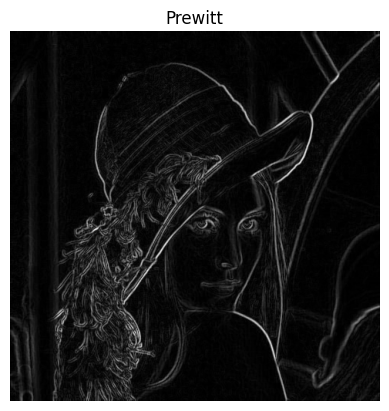

In [ ]:
# hiển thị kết quả
plt.imshow(grad,cmap = 'gray')
plt.title('Prewitt')
plt.axis('off')

(-0.5, 479.5, 479.5, -0.5)

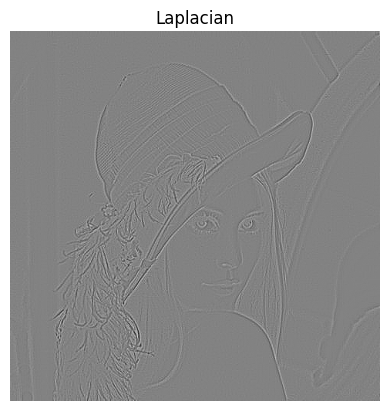

In [ ]:
# tính cường độ Gradient sử dụng bộ lọc Laplace
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.axis('off')


## câu 2b

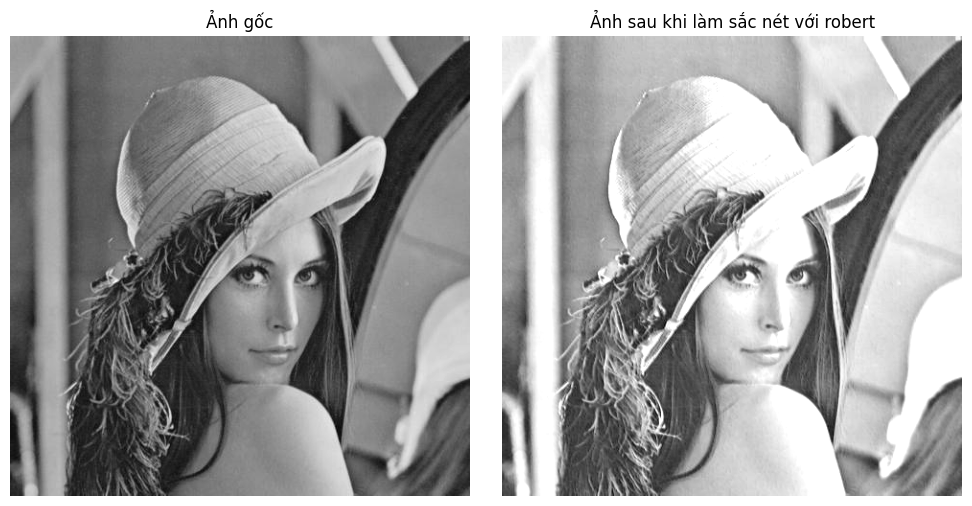

In [ ]:
def sharpen_img(filter_x,filter_y,img):
  grad = np.abs(filter_x) + np.abs(filter_y)

  # chuẩn hóa độ lớn kết quả khoảng 0 - 255
  grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX)
  #chuyển đổi về unit8
  grad = np.uint8(grad)
  #làm nét
  sharpen_img = cv2.addWeighted(img, 1.5, grad, -0.5, 0)

  return sharpen_img

img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

out =sharpen_img(robert_x,robert_y,img)

fx,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Ảnh gốc')
ax[0].axis('off')
ax[1].imshow(out,cmap = 'gray')
ax[1].set_title('Ảnh sau khi làm sắc nét với robert')
ax[1].axis('off')
plt.tight_layout()
plt.show()


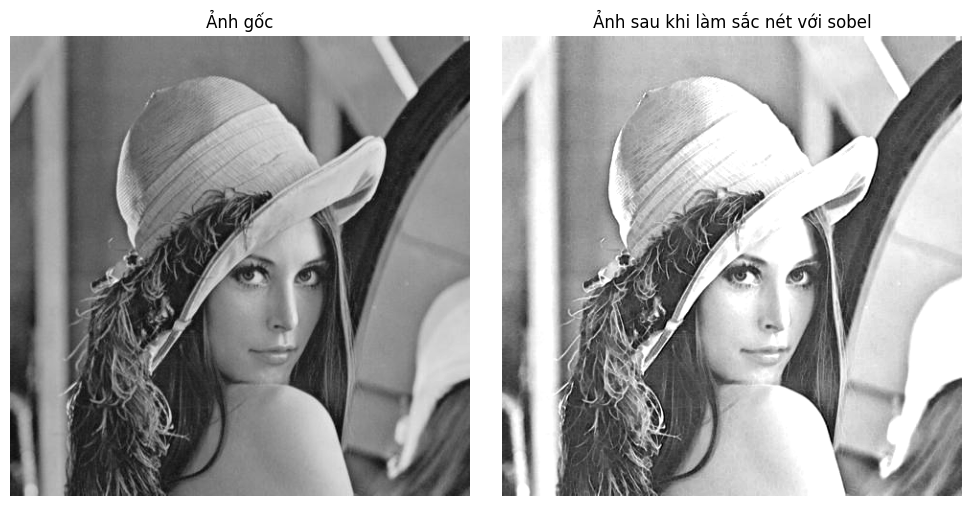

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

out = sharpen_img(sobel_x,sobel_y,img)

fx,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Ảnh gốc')
ax[0].axis('off')
ax[1].imshow(out,cmap = 'gray')
ax[1].set_title('Ảnh sau khi làm sắc nét với sobel')
ax[1].axis('off')
plt.tight_layout()
plt.show()

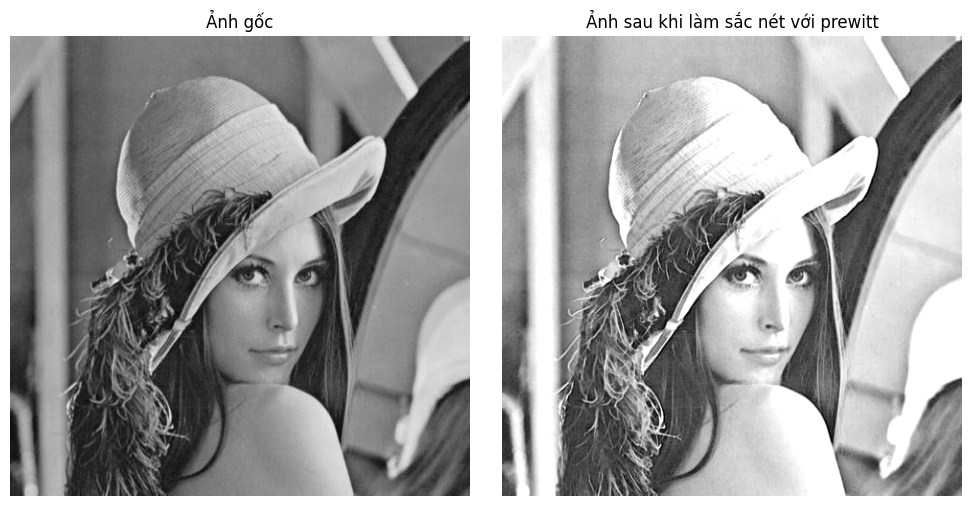

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

out = sharpen_img(prewitt_x,prewitt_y,img)

fx,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Ảnh gốc')
ax[0].axis('off')
ax[1].imshow(out,cmap = 'gray')
ax[1].set_title('Ảnh sau khi làm sắc nét với prewitt')
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 2c Viết hàm xác định ngưỡng bằng phương pháp  ngưỡng toàn cục cơ bản hoặc Otsu
def nguong_toan_cuc(img):
  img_copy = img.copy()
  t = np.mean(img)
  g1=[]
  g2 = []
  while(True):
    for i in range (img_copy.shape[0]):
      for j in range (img_copy.shape[1]):
        if (img_copy[i,j] < t):
          g1.append(img_copy[i,j])

        else:
          g2.append(img_copy[i,j])
    m1 = np.mean(g1)
    m2 = np.mean(g2)

    t0 = (m1+m2)/2
    delta_t = abs(t - t0)
    if (delta_t < 1):
      break
    t = t0
    g1.clear()
    g2.clear()
  return t0
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

print(nguong_toan_cuc(img))

117.00206303636742


In [ ]:
# Otsu

def otsu_threshold(image):
    # Chuyển đổi ảnh sang ảnh xám nếu cần
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tính histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel()  # Chuyển đổi thành mảng 1 chiều

    # Tính tổng số pixel
    total_pixels = image.size

    # Khởi tạo biến
    sum_total = np.dot(np.arange(256), hist)
    sum_b, weight_b, weight_f = 0, 0, 0
    max_variance, threshold = 0, 0

    for t in range(256):
        weight_b += hist[t]
        if weight_b == 0:
            continue
        weight_f = total_pixels - weight_b
        if weight_f == 0:
            break

        sum_b += t * hist[t]
        mean_b = sum_b / weight_b
        mean_f = (sum_total - sum_b) / weight_f

        # Tính variance giữa các lớp
        variance = weight_b * weight_f * (mean_b - mean_f) ** 2

        # Cập nhật ngưỡng nếu variance lớn hơn max_variance
        if variance > max_variance:
            max_variance = variance
            threshold = t

    return threshold

# Ví dụ sử dụng
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)

threshold_value = otsu_threshold(img)
print("Ngưỡng Otsu:", threshold_value)


Ngưỡng Otsu: 116


In [ ]:
# 2d Viết hàm  phân đoạn ảnh  xám  với ngưỡng T xác định được  ở câu c.  Hiển thị ảnh sau phân đoạn
def phan_doan_bang_cat_nguong(img,nguong): # Định nghĩa hàm phân đoạn bằng cắt ngưỡng
    m, n= img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
      for j in range(n):
          if (img[i,j] < nguong):
                img_phan_doan_cat_nguong [i,j] = 0
          else:
                img_phan_doan_cat_nguong[i,j] = 225 # tương đương gt 1 trong công thức 1
    return img_phan_doan_cat_nguong

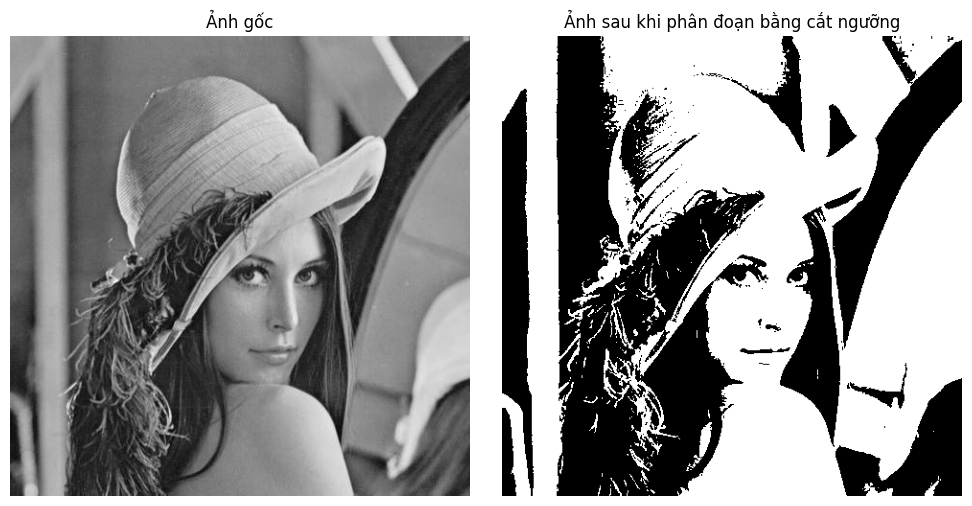

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png',0)


thres_img = phan_doan_bang_cat_nguong(img,nguong_toan_cuc(img))
fx,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Ảnh gốc')
ax[0].axis('off')
ax[1].imshow(thres_img,cmap = 'gray')
ax[1].set_title('Ảnh sau khi phân đoạn bằng cắt ngưỡng')
ax[1].axis('off')
plt.tight_layout()
plt.show()
